In [2]:
#exercise from https://towardsdatascience.com/8-visualizations-with-python-to-handle-multiple-time-series-data-19b5b2e66dd0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('data/Measurement_summary.csv')
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
#check the number of distinct station codes.
df['Station code'].nunique()

25

In [6]:
#there are 25 stations, check station codes
list_scode = list(set(df['Station code']))
list_scode

[101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125]

In [8]:
list_add = list(df['Address'])
District = [i.split(',')[2] for i in list_add]
df['District'] = District

#create list with district names
list_district = list(set(District))

In [9]:
list_YM =[i.split(" ")[0][:-3] for i in list(df['Measurement date'])]
list_Year =[i.split(" ")[0][0:4] for i in list(df['Measurement date'])]
list_Month =[i.split(" ")[0][5:7] for i in list(df['Measurement date'])]

df['YM'] = list_YM
df['Year'] = list_Year
df['Month'] = list_Month

#create monthly dataframe
df_monthly = df.groupby(['Station code', 'District','YM','Year','Month']).mean()
df_monthly = df_monthly[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].reset_index()

df_monthly.head()

,Station code,District,YM,Year,Month,SO2,NO2,O3,CO,PM10,PM2.5
0,101,Jongno-gu,2017-01,2017,01,0.004401,0.037481,0.014972,0.695968,51.024194,35.118280
1,101,Jongno-gu,2017-02,2017,02,-0.022152,0.010290,-0.008138,0.600000,41.970238,28.857143
2,101,Jongno-gu,2017-03,2017,03,0.005015,0.041267,0.026862,0.698118,55.146505,40.311828
3,101,Jongno-gu,2017-04,2017,04,0.003308,0.034699,0.033512,0.598056,50.769444,26.536111
4,101,Jongno-gu,2017-05,2017,05,0.003461,0.031724,0.039319,0.490591,55.129032,22.680108


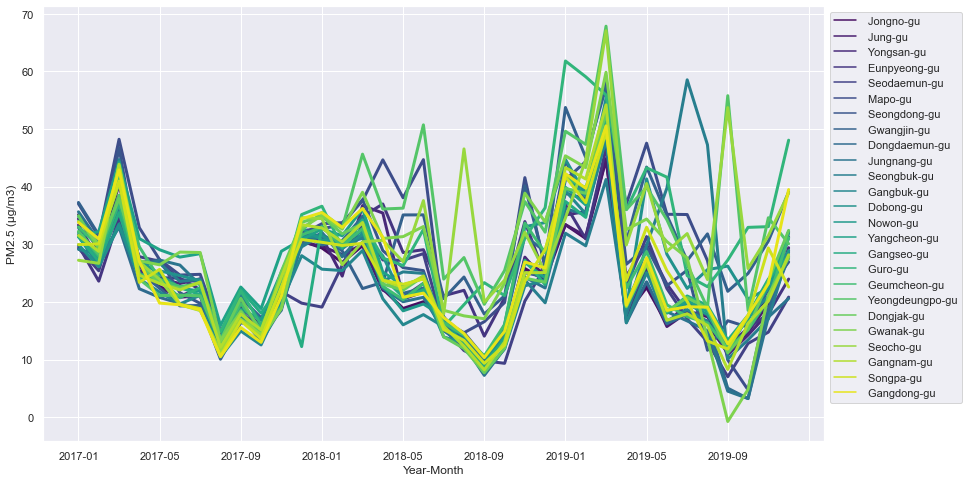

In [11]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x='YM', y='PM2.5',hue='District',
                 palette='viridis', legend = 'full', lw=3)


ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1,1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

In [14]:
import plotly.graph_objects as go

#extract color palette, the palette can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode)).as_hex())

fig = go.Figure()
for d,p in zip(list_district, pal):
    fig.add_trace(go.Scatter(x = df_monthly[df_monthly['District']==d]['YM'],
                             y = df_monthly[df_monthly['District']==d]['PM2.5'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   # 

fig.show()

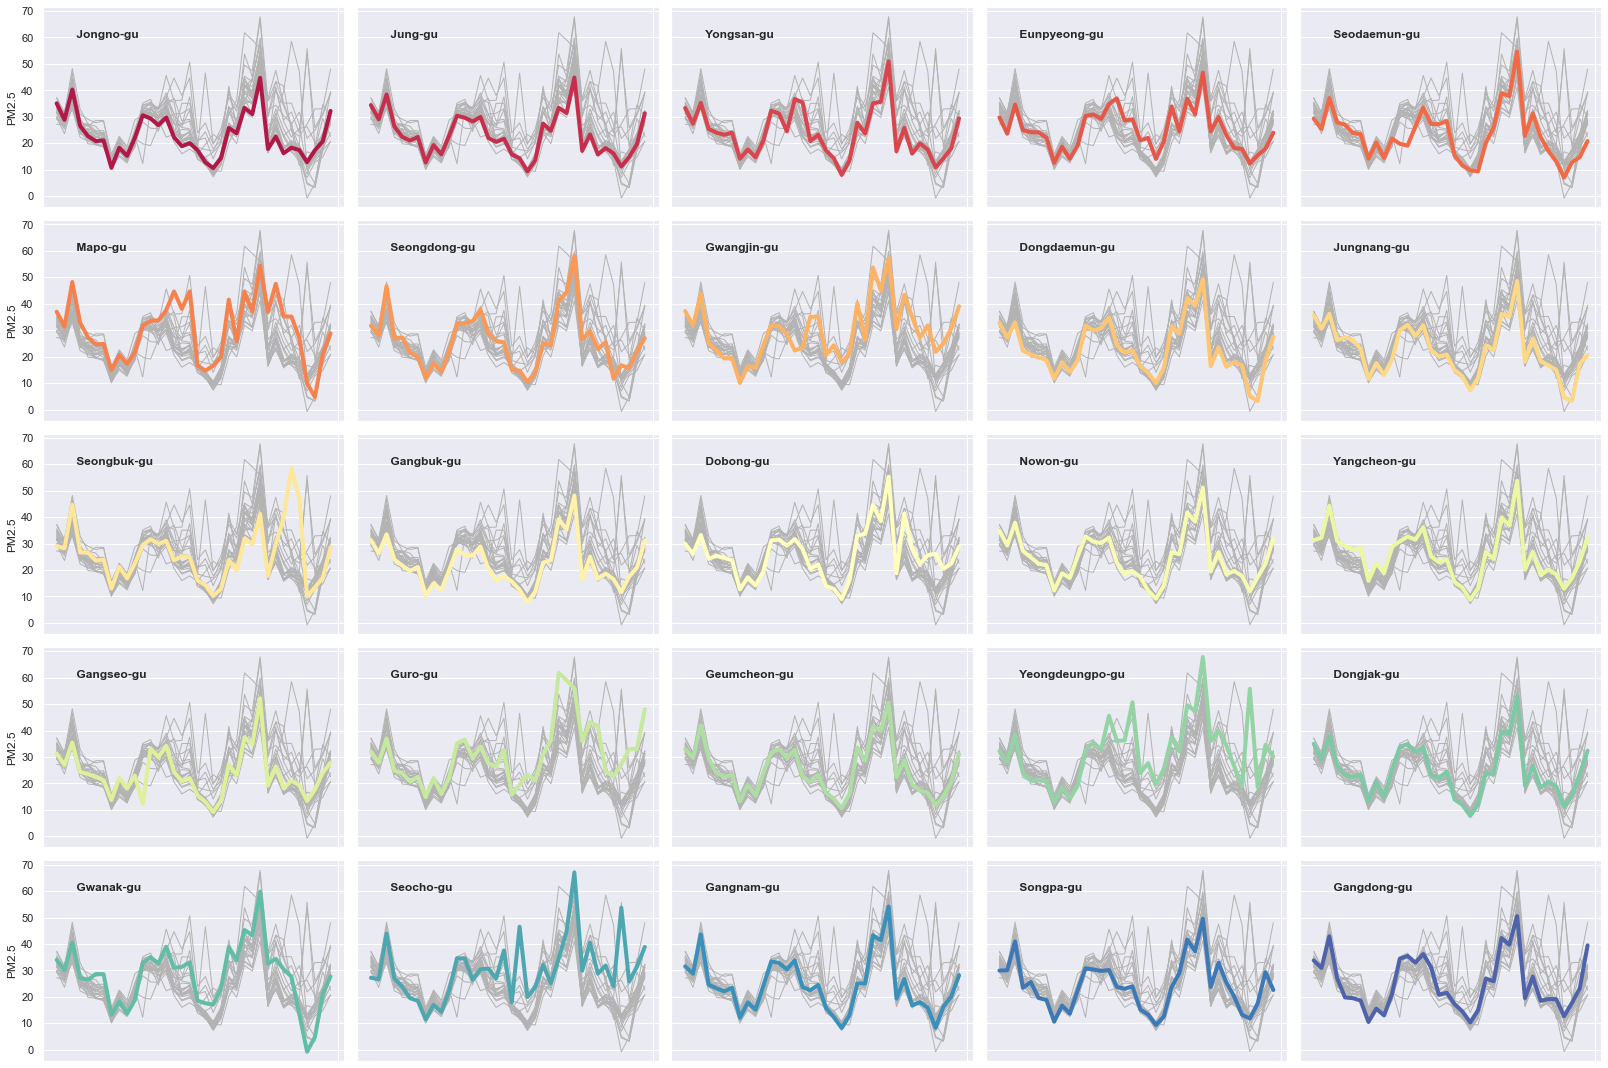

In [18]:
#2. Comparing one by one with Small Multiple Time Series.
g = sns.relplot(data = df_monthly,
               x='YM', y='PM2.5', col = "District",
               hue = "District", kind="line",palette="Spectral",
               linewidth = 4, zorder = 5,
               col_wrap = 5, height = 3 ,aspect =1.5, legend = False)
#add text and silhuaettes
for time, ax in g.axes_dict.items():
    ax.text(.1,.85,time,
           transform = ax.transAxes, fontweight='bold')
    sns.lineplot(data = df_monthly, x = "YM", y= 'PM2.5',
                units='District', estimator = None, color = ".7",
                linewidth = 1, ax = ax
                )

ax.set_xticks('')
g.set_titles("")
g.set_axis_labels("", "PM2.5")
g.tight_layout()

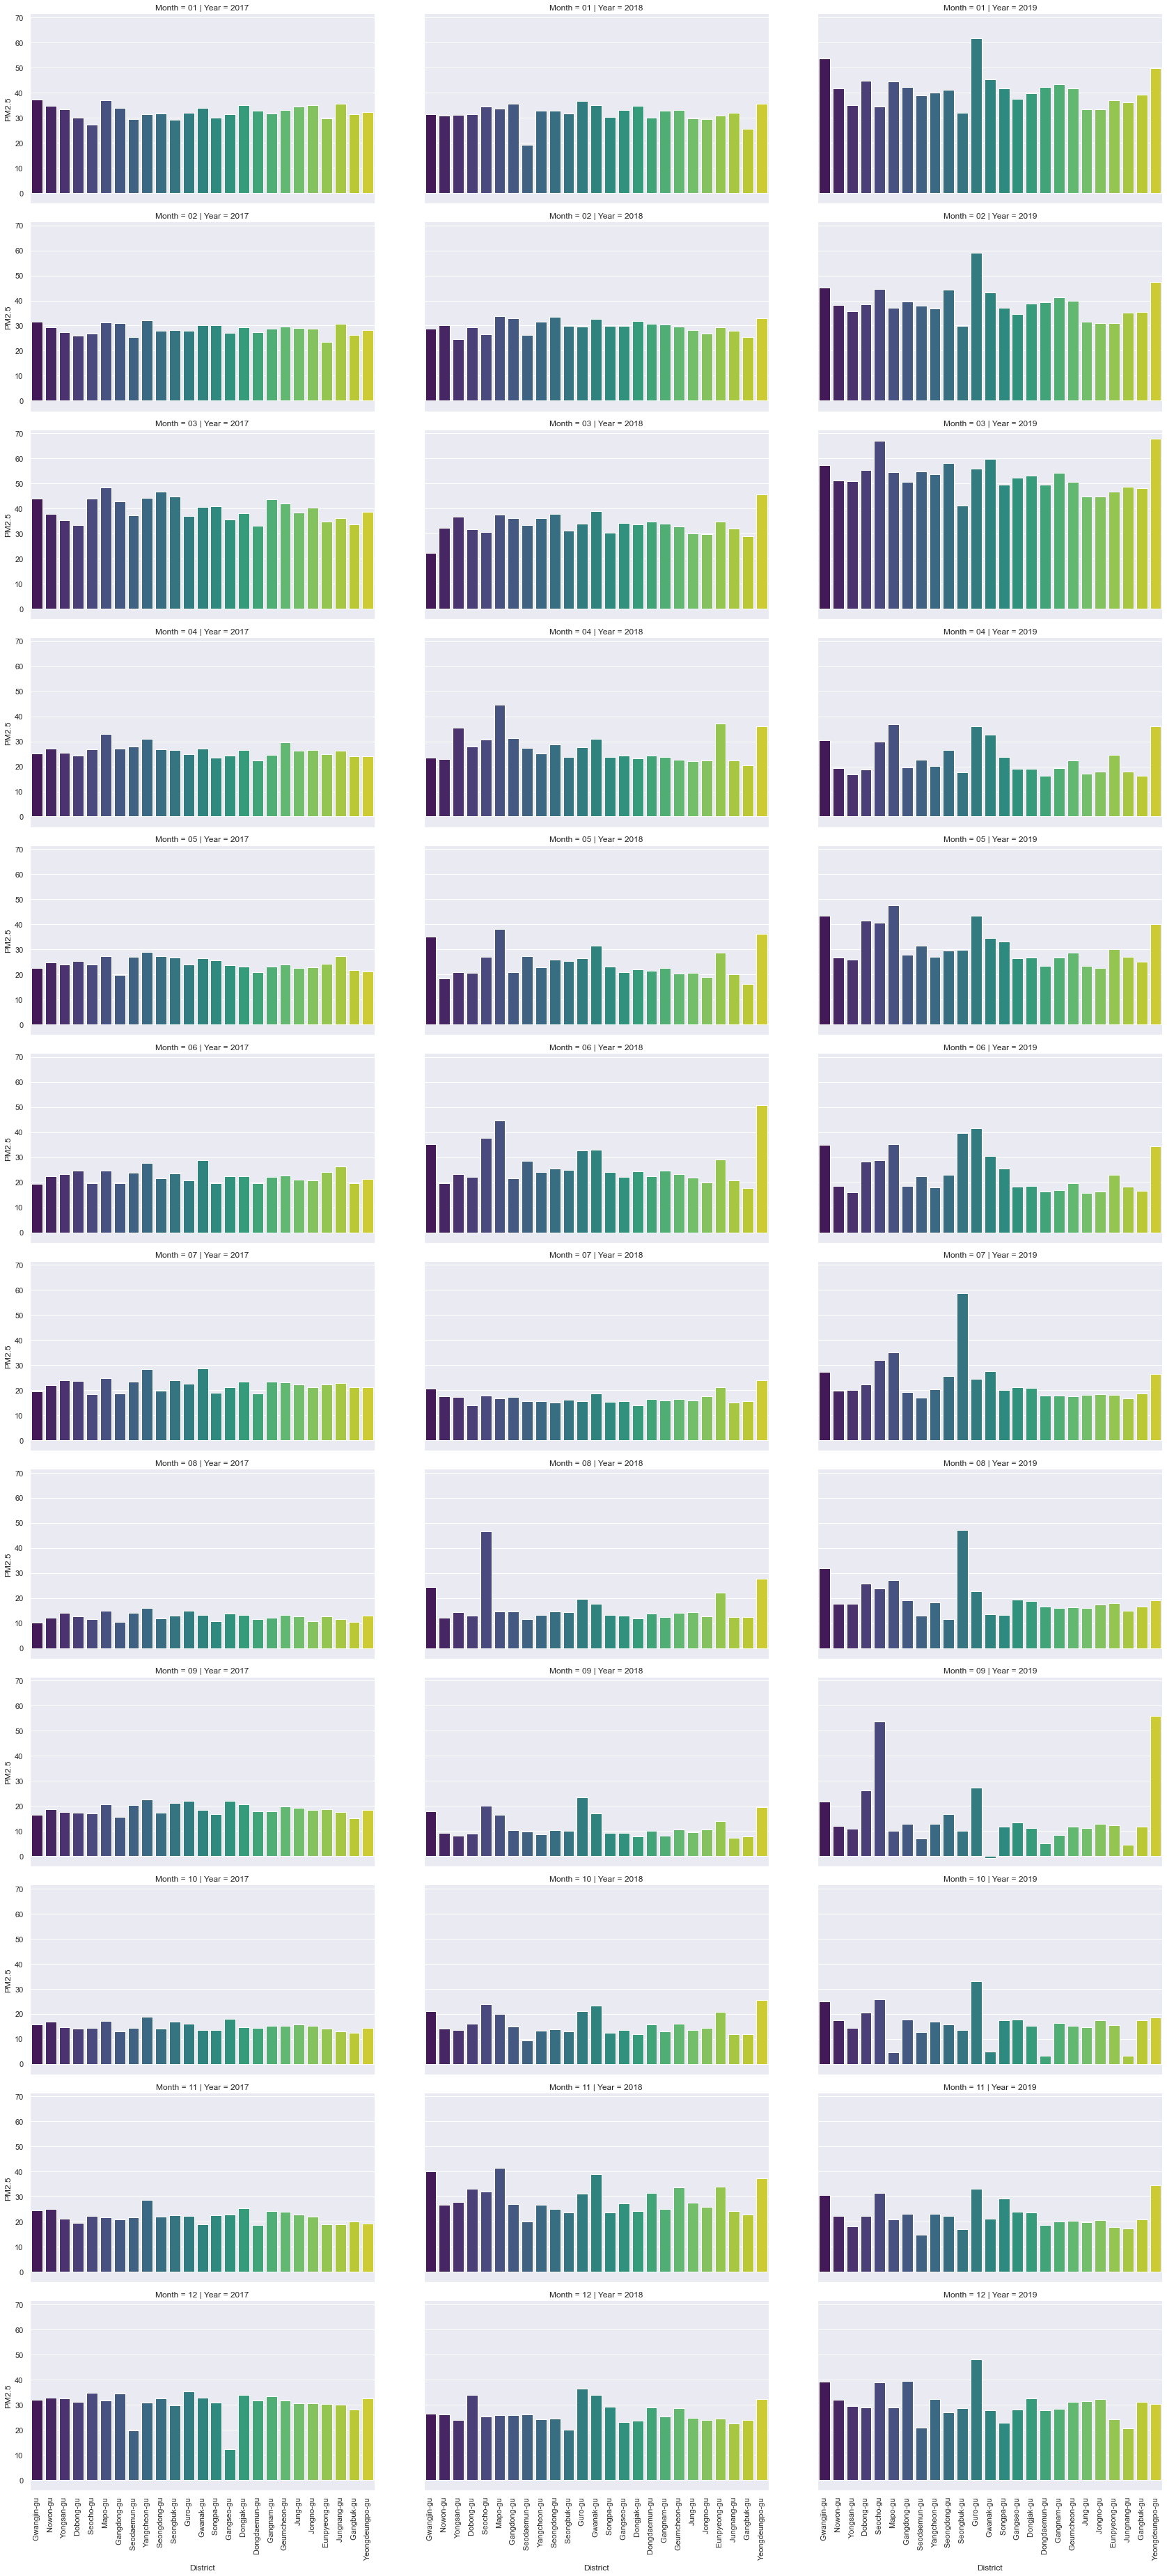

In [19]:
#changing the point of view with Facet grid
g = sns.FacetGrid(df_monthly, col="Year", row="Month", height=4.2, aspect=1.9)
g = g.map(sns.barplot,'District', 'PM2.5', palette='viridis', ci=None,
         order= list_district)

g.set_xticklabels(rotation = 90)
plt.show()

In [20]:
#Using color with heatmap

df_pivot = pd.pivot_table(df_monthly,
                         values='PM2.5',
                         index='District',
                         columns='YM')
df_pivot

YM,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
District,,,,,,,,,,,,,,,,,,,,,
Dobong-gu,29.938172,26.101190,33.245968,24.245833,25.389785,24.570833,23.674731,12.673387,17.268056,14.159946,...,55.300766,18.795549,41.342898,28.261111,22.337483,25.601648,26.211656,20.478495,22.380556,28.894809
Dongdaemun-gu,32.892473,27.238095,32.967742,22.276389,20.774194,19.733333,18.737903,11.646505,17.954167,14.250000,...,49.373563,16.368567,23.486370,16.206944,17.882434,16.701351,5.029141,3.223118,18.748611,27.607923
Dongjak-gu,34.952957,29.187500,37.931452,26.590278,23.169355,22.398611,23.310484,13.271505,20.622222,14.750000,...,53.065134,19.164117,26.606887,18.375000,20.756570,18.861644,11.150307,15.267473,23.637500,32.411202
Eunpyeong-gu,29.771505,23.595238,34.607527,24.941667,24.189516,24.125000,22.129032,12.572581,18.712500,14.106183,...,46.705545,24.499305,29.926829,23.079167,18.219917,17.824897,12.380368,15.455645,17.930556,23.964481
Gangbuk-gu,31.387097,26.311012,33.530914,23.969444,21.713710,19.647222,21.142473,10.440860,14.944444,12.534946,...,48.159004,16.389430,25.091822,16.687500,18.677732,16.542582,11.670245,17.536290,20.952778,31.173497
Gangdong-gu,33.797043,30.922619,42.892473,27.000000,19.787634,19.504167,18.595430,10.498656,15.556944,12.981183,...,50.542146,19.477051,27.668580,18.529167,19.156293,19.087838,12.699387,17.689516,23.179167,39.494536
Gangnam-gu,31.529570,28.763393,43.662634,24.643056,23.193548,22.076389,23.450269,12.126344,17.863889,15.145161,...,54.191571,19.324061,26.741750,16.805556,17.944675,15.898649,8.274540,16.293011,20.120833,28.166667
Gangseo-gu,31.284946,27.037202,35.482527,24.338889,23.581989,22.508333,21.232527,13.684140,22.069444,18.051075,...,52.208413,19.152990,26.460545,18.179167,21.027663,19.367072,13.357362,17.668011,23.962500,27.913934
Geumcheon-gu,33.009409,29.656250,42.028226,29.568056,23.959677,22.655556,23.217742,13.178763,19.681944,15.272849,...,50.526820,22.385257,28.734577,19.497222,17.432918,16.335135,11.828221,15.133065,20.475000,31.133880


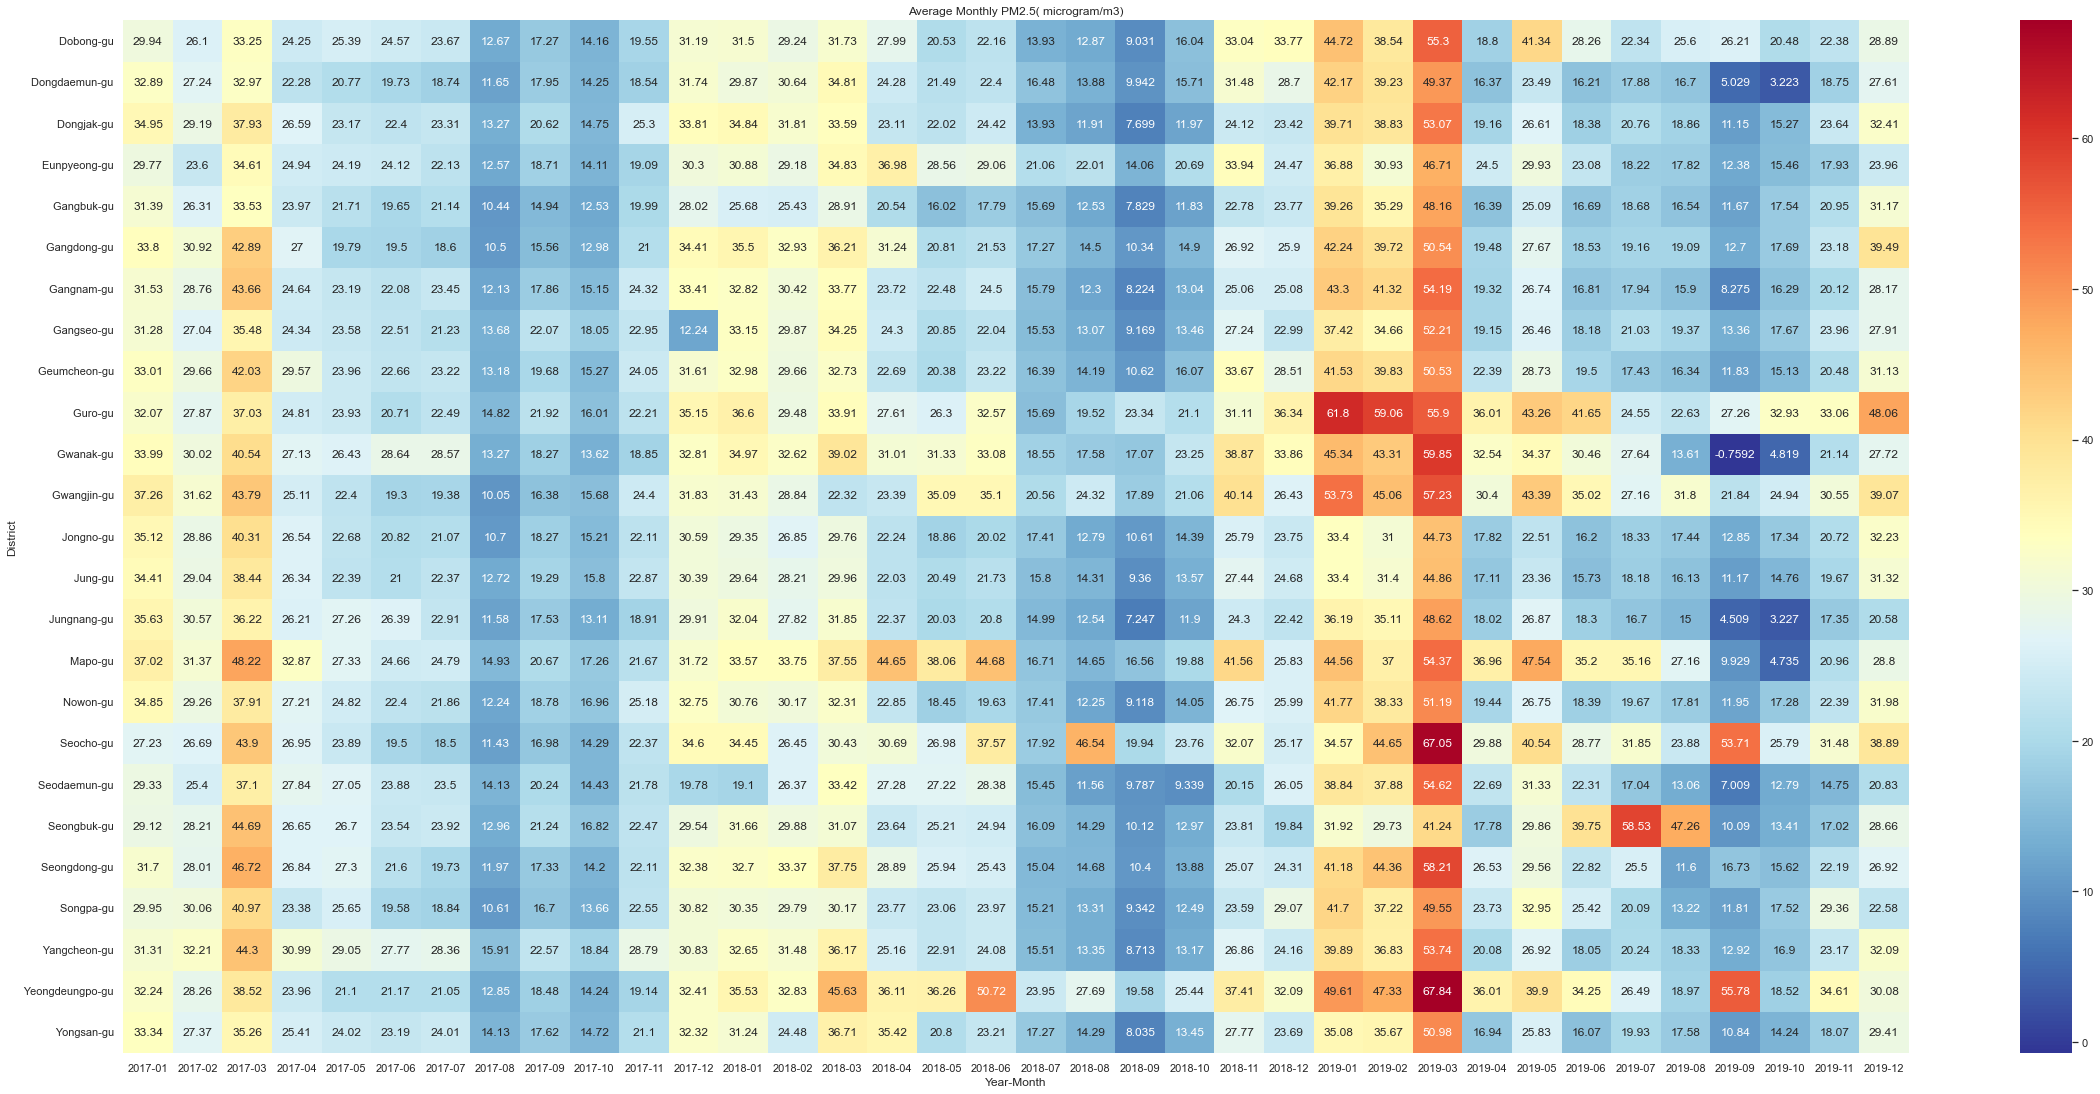

In [21]:
plt.figure(figsize = (40,19))
plt.title('Average Monthly PM2.5( microgram/m3)')

sns.heatmap(df_pivot, annot=True, cmap='RdYlBu_r', fmt='.4g',)
plt.xlabel("Year-Month")
plt.ylabel('District')
plt.show()

In [22]:
#5. Applying angles with a Radar chart
df_19 = df_monthly[df_monthly['Year']=='2019']

In [ ]:
import plotly.graph_objects as go

#extract color palette, tth epalette name can be changed
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_scode).as_hex()))

months = list(reversed([str(i) for i in list(range(1,13))])) ['12']
list_PM = 